## Multinomial Logistic Regression With File

In [49]:
# Importing necessary modules
import tensorflow as tf
import numpy as np

tf.__version__

'2.3.0'

In [50]:
num_features = 16
num_classes = 7 # labels

# preparing training data
xy = np.loadtxt('https://raw.githubusercontent.com/oberak/ai/main/csv/data-04-zoo.csv', delimiter=',', dtype=np.float32)
x_train = xy[:, 0:-1]
y_train = xy[:, [-1]] 
y_train = tf.one_hot(y_train, num_classes)
y_train = tf.reshape(y_train, [-1, num_classes])

y_train

<tf.Tensor: shape=(101, 7), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1

In [51]:
# Initializing weights and biases
W = tf.Variable(tf.random.normal([num_features, num_classes]), name='weight')
b = tf.Variable(tf.random.normal([num_classes]), name='bias')

# for cost plot
global cost_log
cost_log = np.array([])

In [52]:
# Hypothesis: Softmax regression H(x) = exp(logis) / reduce_sum(exp(logits, dim))
def softmax(X):
  linear = tf.matmul(tf.cast(X, dtype=tf.float32), W) + b
  return tf.nn.softmax(linear)

In [53]:
# Cost(loss) function: Cross entropy =  - Sum( y*log(H(x)) + (1-y) * log(1 - H(x)) ) / m
def cross_entropy(predicted, real):
  return -tf.reduce_mean(real * tf.math.log(predicted) + ( 1 - np.array(real)) * tf.math.log(1 - predicted))
  #return tf.reduce_mean(-tf.reduce_sum(real * tf.math.log(predicted))) # Same as above

In [54]:
# Optimizer: Gradient descent W = W - a(dy / dW), b = b - a(dy / db)
def gd(X, Y, learning_rate):
  # get gradient
  with tf.GradientTape(persistent=True) as g:
    pred = softmax(X)
    loss = cross_entropy(pred, Y)

  dy_dw = g.gradient(loss, W)
  dy_db = g.gradient(loss, b)
  #print('loss', loss.numpy())
 
  W.assign_sub(learning_rate * dy_dw)
  b.assign_sub(learning_rate * dy_db)
  
  return loss.numpy()

In [55]:
# training function
def train(x, y, learning_rate=0.01, epoch=200):
  for i in range(epoch):
    loss = gd(x, y, learning_rate)

    # print loss
    if (i+1) % 500 == 0:
      print ('{} - loss: {}'.format(i+1, loss))
    
    # for cost plot
    global cost_log
    cost_log = np.append(cost_log, np.array(loss))

In [56]:
# train
train(x_train, y_train, 0.02, 10000)
print('Model: \n Weight = {} \n bias = {}'.format(W.numpy(), b.numpy()[0])) # W=2, b=0

500 - loss: 0.4299711287021637
1000 - loss: 0.2791568338871002
1500 - loss: 0.21357327699661255
2000 - loss: 0.1787056177854538
2500 - loss: 0.1567109227180481
3000 - loss: 0.14100445806980133
3500 - loss: 0.12889492511749268
4000 - loss: 0.11910603195428848
4500 - loss: 0.11093821376562119
5000 - loss: 0.10396212339401245
5500 - loss: 0.09789363294839859
6000 - loss: 0.09253553301095963
6500 - loss: 0.08774647861719131
7000 - loss: 0.08342309296131134
7500 - loss: 0.07948816567659378
8000 - loss: 0.07588306069374084
8500 - loss: 0.07256229966878891
9000 - loss: 0.06948982924222946
9500 - loss: 0.06663650274276733
10000 - loss: 0.06397819519042969
Model: 
 Weight = [[ 1.2701209  -0.8040518  -1.9641036   0.26559228 -0.29928932  1.4159462
  -0.05513156]
 [-1.0459057   2.4521787  -0.44079146 -1.3771585  -0.03254544  0.8766986
  -1.3266814 ]
 [-1.2770969   0.643553   -0.25180027  2.0455482   0.00678658  1.1737357
  -0.30347374]
 [ 0.7028454  -0.8684862   0.75720686 -0.5625111   0.45986715 

In [57]:
# check prediction and accuracy
hypothesis = softmax(x_train)
pred = tf.math.argmax(hypothesis, 1)
real = tf.math.argmax(y_train, 1)

accuracy = tf.reduce_mean(tf.cast(tf.equal(pred, real), tf.float32))
print('Hypothesis:', hypothesis.numpy())
print('Real:', real.numpy())
print('Pred:', pred.numpy())
print('Accuracy: {}%'.format(accuracy.numpy()*100))

Hypothesis: [[9.84822154e-01 2.72931589e-04 1.20637671e-03 1.00676218e-04
  7.05348933e-03 4.40394739e-03 2.14028475e-03]
 [9.94694412e-01 4.73292894e-04 6.61960978e-04 1.91914078e-05
  2.50901724e-03 1.40803924e-03 2.34171646e-04]
 [4.72797640e-03 2.08813250e-02 2.41520107e-02 9.28387105e-01
  8.56668223e-03 1.95726621e-04 1.30891353e-02]
 [9.84822154e-01 2.72931589e-04 1.20637671e-03 1.00676218e-04
  7.05348933e-03 4.40394739e-03 2.14028475e-03]
 [9.91255283e-01 8.51919292e-04 2.00925977e-03 9.57077500e-05
  4.17447649e-03 8.32358084e-04 7.80937204e-04]
 [9.94694412e-01 4.73292894e-04 6.61960978e-04 1.91914078e-05
  2.50901724e-03 1.40803924e-03 2.34171646e-04]
 [9.97930765e-01 1.88986436e-04 5.41843940e-04 3.55548364e-05
  5.56930027e-04 7.15509930e-04 3.01721502e-05]
 [1.31264627e-02 1.27746146e-02 1.79617591e-02 9.51126754e-01
  3.15187150e-03 4.63994802e-04 1.39462925e-03]
 [4.72797640e-03 2.08813250e-02 2.41520107e-02 9.28387105e-01
  8.56668223e-03 1.95726621e-04 1.30891353e-02

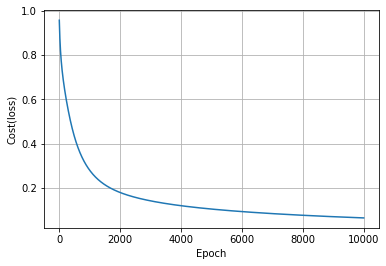

In [58]:
import matplotlib.pyplot as plt

# cost logs
plt.plot(range(len(cost_log)), cost_log)
plt.xlabel('Epoch')
plt.grid(True)
plt.ylabel('Cost(loss)')
plt.show()